# Comparing Containerized QUICK with a Normal Installation
This notebook compares QUICK 23.08a running in a container with a normal installation. These tests were run on the same machine running A100 GPUs, specifically the PCIE 40GB variant.

The molecules used for comparison were [morphine](../input/morphine.in), [psb5](../input/psb5.in), [taxol](../input/taxol.in) and [valinomycin](../input/valinomycin.in).

In [1]:
# imports
import pandas as pd

In [2]:
# Load compiled output data
results_filepath = "./full-results.csv"
results = pd.read_csv(results_filepath)
results["datetime"] = pd.to_datetime(results["datetime"], format="%a %b %d %H:%M:%S %Y")
results.head()

,gpu_type,gpu_count,containerized,molecule,scf_time,gradient_time,total_time,system,datetime
0,NVIDIA-A100-PCIE-40GB,1,True,morphine,6.643246,8.074201,18.963636,expanse,2024-01-18 10:36:59
1,NVIDIA-A100-PCIE-40GB,2,True,morphine,4.214635,4.474140,13.116883,expanse,2024-01-18 10:37:19
2,NVIDIA-A100-PCIE-40GB,3,True,morphine,3.806321,3.318024,11.496085,expanse,2024-01-18 10:37:33
3,NVIDIA-A100-PCIE-40GB,1,True,psb5,1.299491,1.280677,19.505161,expanse,2024-01-18 10:36:26
4,NVIDIA-A100-PCIE-40GB,2,True,psb5,0.904503,0.755967,5.493714,expanse,2024-01-18 10:36:47


## Select comparison data
We want to see the results of QUICK in a container and normal installation on NVIDIA-A100-PCIE-40GB on expanse. 

We also want to see performance on one and two GPUs to compare QUICK MPI CUDA.

In [25]:
# Filter down to results from NVIDIA-A100-PCIE-40GB on expanse
system_filter = results["system"] == "expanse"
gpu_filter = results["gpu_type"] == "NVIDIA-A100-PCIE-40GB"
count_filter = results["gpu_count"] == 1
comparison_timings = results[["gpu_count", "containerized", "molecule", "scf_time", "gradient_time", "total_time", "datetime"]].where(system_filter & gpu_filter & count_filter)
comparison_timings.dropna(inplace=True)

# Define a function to combine values
def combine_values(row):
    if row['containerized']:
        return f"{row['molecule']}(container)"
    else:
        return f"{row['molecule']}(normal)"

# Apply the function to create the new column
comparison_timings['combined_column'] = comparison_timings.apply(combine_values, axis=1)

comparison_timings = comparison_timings.sort_values(["molecule", "gpu_count"])
comparison_timings

,gpu_count,containerized,molecule,scf_time,gradient_time,total_time,datetime,combined_column
0,1.0,True,morphine,6.643246,8.074201,18.963636,2024-01-18 10:36:59,morphine(container)
186,1.0,False,morphine,6.730798,8.303771,18.944405,2023-10-29 02:00:46,morphine(normal)
3,1.0,True,psb5,1.299491,1.280677,19.505161,2024-01-18 10:36:26,psb5(container)
189,1.0,False,psb5,1.338871,1.333368,6.078598,2023-10-29 02:00:27,psb5(normal)
6,1.0,True,taxol,32.691907,50.558595,90.050375,2024-01-18 10:37:45,taxol(container)
192,1.0,False,taxol,32.246529,51.266560,90.150506,2023-10-29 02:01:29,taxol(normal)
9,1.0,True,valinomycin,68.274292,91.715287,170.543972,2024-01-18 10:40:47,valinomycin(container)
195,1.0,False,valinomycin,66.584901,92.843141,170.352197,2023-10-29 02:04:27,valinomycin(normal)


<Axes: title={'center': 'QUICK Container vs Normal Timings Single GPU'}, xlabel='Molecule', ylabel='Time in seconds'>

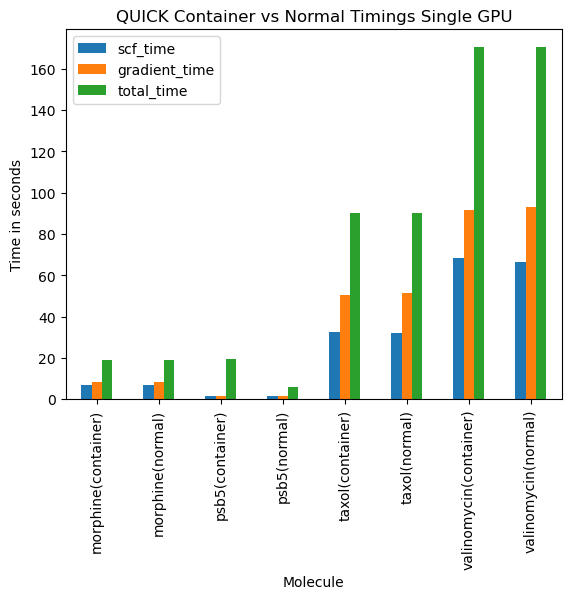

In [37]:
ax = comparison_timings.plot.bar(x="combined_column", y=["scf_time", "gradient_time", "total_time"])
ax.set_title("QUICK Container vs Normal Timings Single GPU")
ax.set_xlabel("Molecule")
ax.set_ylabel("Time in seconds")
ax

<Axes: title={'center': 'QUICK Container vs Normal Timings Dual GPU'}, xlabel='Molecule', ylabel='Time in seconds'>

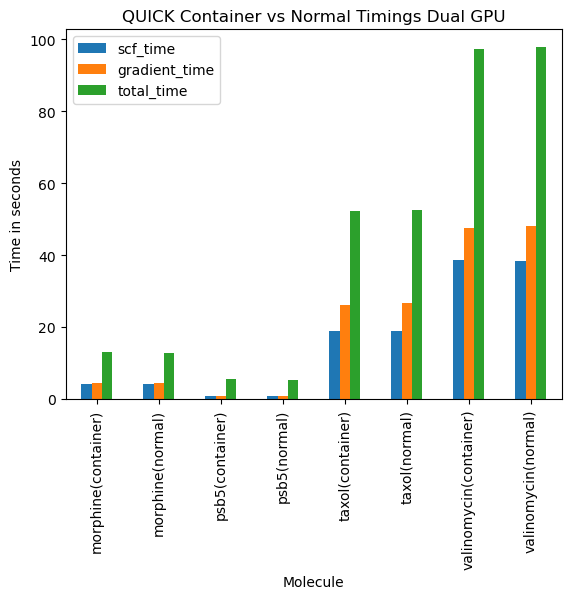

In [38]:
# Filter down to results from NVIDIA-A100-PCIE-40GB on expanse
system_filter = results["system"] == "expanse"
gpu_filter = results["gpu_type"] == "NVIDIA-A100-PCIE-40GB"
count_filter = results["gpu_count"] == 2
comparison_timings = results[["gpu_count", "containerized", "molecule", "scf_time", "gradient_time", "total_time", "datetime"]].where(system_filter & gpu_filter & count_filter)
comparison_timings.dropna(inplace=True)

# Define a function to combine values
def combine_values(row):
    if row['containerized']:
        return f"{row['molecule']}(container)"
    else:
        return f"{row['molecule']}(normal)"

# Apply the function to create the new column
comparison_timings['combined_column'] = comparison_timings.apply(combine_values, axis=1)

comparison_timings = comparison_timings.sort_values(["molecule", "gpu_count"])
comparison_timings

ax = comparison_timings.plot.bar(x="combined_column", y=["scf_time", "gradient_time", "total_time"])
ax.set_title("QUICK Container vs Normal Timings Dual GPU")
ax.set_xlabel("Molecule")
ax.set_ylabel("Time in seconds")
ax